In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [34]:
df.drop("Address",axis=1,inplace=True)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [35]:
# CHECK NULL

pd.DataFrame((df.isnull().sum()/len(df))*100,columns=["Missing values"])



,Missing values
Avg. Area Income,0.20
Avg. Area House Age,0.00
Avg. Area Number of Rooms,0.10
Avg. Area Number of Bedrooms,0.12
Area Population,0.00
Price,0.00


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [60]:
def box_plot(column):
    # sns.boxplot(df[column])
    df[column].plot(kind="box")
    plt.show()

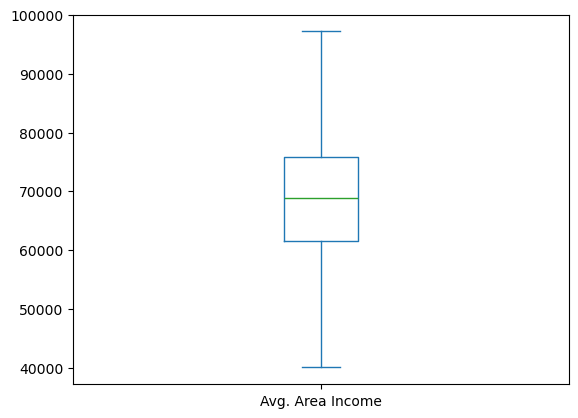

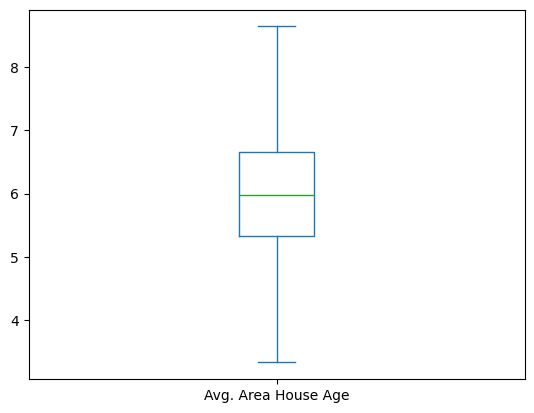

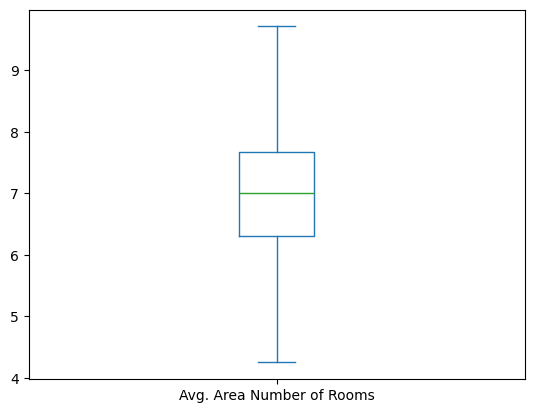

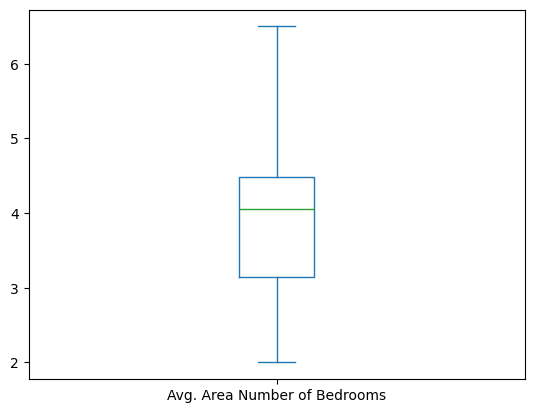

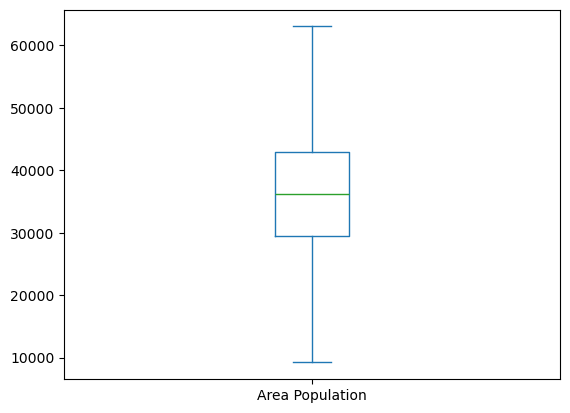

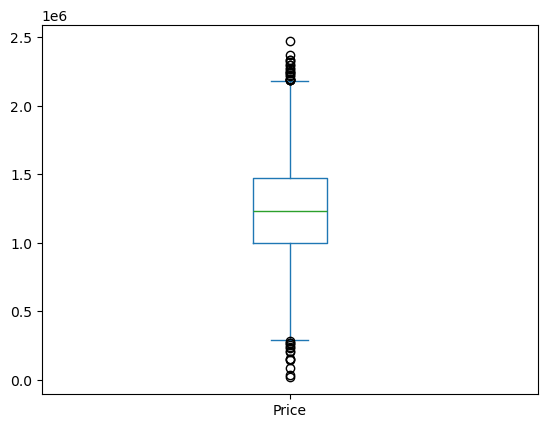

In [61]:
for i in df.columns:
    box_plot(i)

In [39]:
df["Avg. Area Income"] = df["Avg. Area Income"].fillna(df["Avg. Area Income"].median())
df["Avg. Area Number of Rooms"] = df["Avg. Area Number of Rooms"].fillna(df["Avg. Area Number of Rooms"].median())
df["Avg. Area Number of Bedrooms"] = df["Avg. Area Number of Bedrooms"].fillna(df["Avg. Area Number of Bedrooms"].mean())

In [40]:
(df.isnull().sum()/len(df)) * 100

Avg. Area Income                0.0
Avg. Area House Age             0.0
Avg. Area Number of Rooms       0.0
Avg. Area Number of Bedrooms    0.0
Area Population                 0.0
Price                           0.0
dtype: float64

In [41]:
outliers_to_be_treated = ["Avg. Area Income","Avg. Area House Age","Avg. Area Number of Rooms","Area Population"]

In [42]:
# OUTLIER TREATMENT

def outlier_treatment(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    df[col] = np.where(df[col] > upper_limit,upper_limit,
                       np.where(df[col] < lower_limit,lower_limit,df[col]))

In [43]:
for i in outliers_to_be_treated:
    outlier_treatment(i)

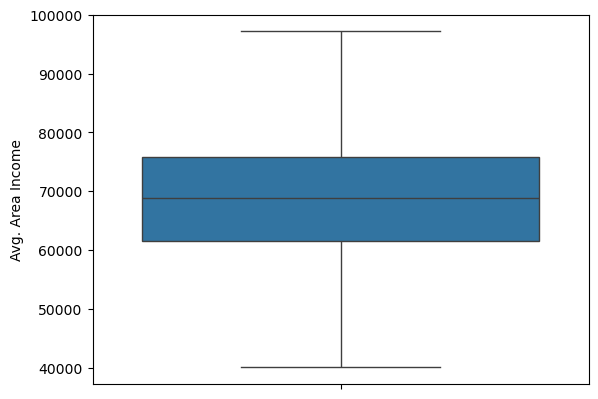

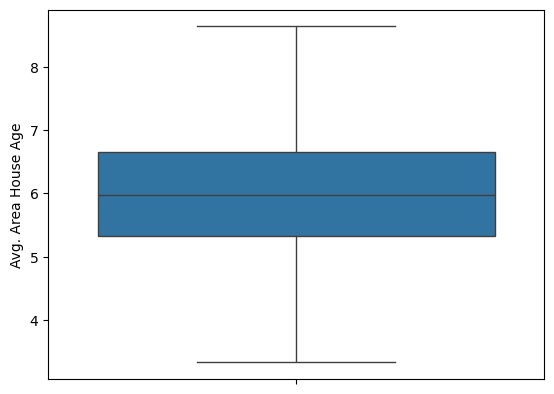

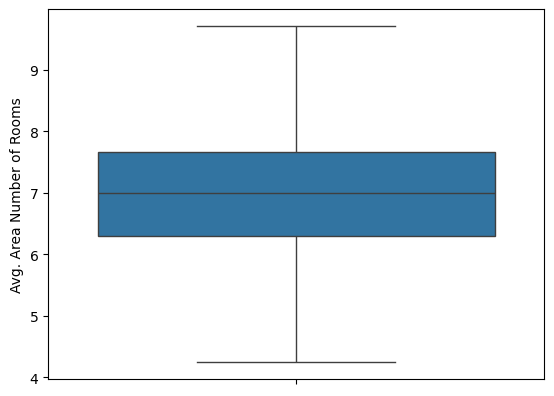

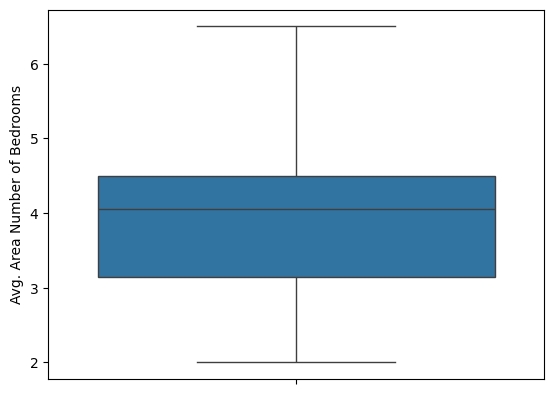

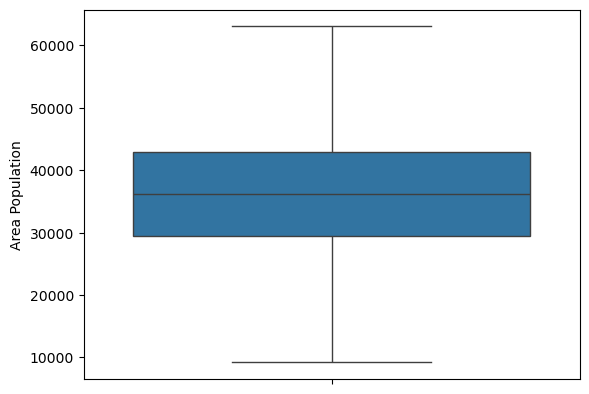

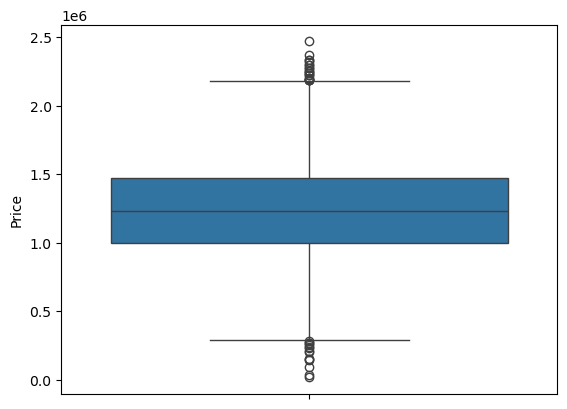

In [44]:
for i in df.columns:
    box_plot(i)

In [45]:
# FEATURE SCALING

x = df.drop("Price",axis=1)
y = df["Price"]

In [46]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
mm_x = mm.fit_transform(x)

mm_x = pd.DataFrame(mm_x ,columns=x.columns)
mm_x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,0.691152,0.442853,0.504888,0.464444,0.257645
1,0.685956,0.503077,0.453927,0.242222,0.575060
2,0.371532,0.477295,0.780143,0.695556,0.513925
3,0.407561,0.726132,0.244477,0.280000,0.466146
4,0.348690,0.321985,0.656874,0.495556,0.318343


<Axes: ylabel='Density'>

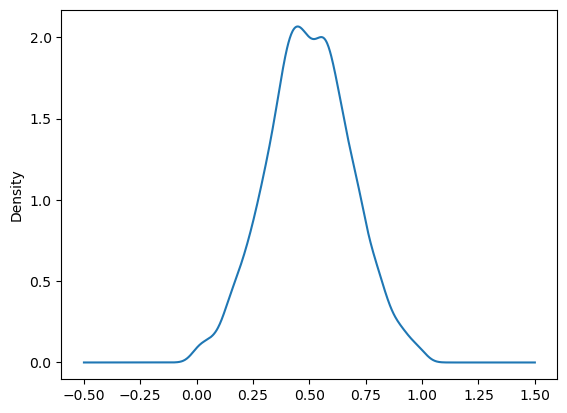

In [47]:
mm_x["Avg. Area House Age"].plot(kind="kde")

In [48]:
# TEST TRAIN DATA

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(mm_x,y,test_size=0.3,random_state=101)

In [49]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [50]:
y_predict_test = lr.predict(x_test)

y_predict_test

array([1258876.07726027,  820639.45963661, 1744328.85310096, ...,
       1454117.50042932,  644016.77745521, 1365235.40338   ])

In [51]:
lr.coef_ , lr.intercept_

(array([1240715.26675759,  882464.08944652,  664786.37083573,
           5517.55415786,  822462.65114946]),
 -573187.3475920542)

In [52]:
from sklearn.metrics import r2_score

r2_score(y_test,y_predict_test)

0.9156697910198233

In [53]:
# predicted_df = pd.concat([x_test,pd.Series(y_test,name="Actual Price"),pd.Series(y_predict_test,name="Predicted values")],axis=1)
predicted_df = x_test.join(pd.Series(y_test,name="Actual Price"),how="inner")
predicted_df["Predicted Price"] = y_predict_test

predicted_df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Actual Price,Predicted Price
1718,0.467600,0.449304,0.648787,0.515556,0.512194,1.251689e+06,1.258876e+06
2511,0.387243,0.300382,0.581504,0.937778,0.311919,8.730483e+05,8.206395e+05
345,0.587828,0.646837,0.747988,0.297778,0.630403,1.696978e+06,1.744329e+06
2521,0.382420,0.545501,0.428722,0.508889,0.366640,1.063964e+06,9.720364e+05
54,0.575568,0.274125,0.561768,0.980000,0.281631,9.487883e+05,9.933280e+05
...,...,...,...,...,...,...,...
3412,0.301940,0.363147,0.652646,0.484444,0.237022,7.043759e+05,7.533828e+05
4020,0.644077,0.409814,0.405415,0.528889,0.374594,1.254938e+06,1.168098e+06
4635,0.346580,0.897124,0.368104,0.026667,0.681807,1.434324e+06,1.454118e+06
1700,0.332025,0.532193,0.192131,0.057778,0.252375,5.340775e+05,6.440168e+05


In [54]:
pd.DataFrame(predicted_df.isnull().sum())

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Actual Price,0
Predicted Price,0


In [55]:
predicted_df.to_csv("C:\\Users\\DELL\\OneDrive\\AI_ML_Lab\\USA_Housing_prediction.csv",index=False)